# Visualize SA

In [1]:
import os
from math import exp, cos, pi
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc

%matplotlib inline

In [2]:
# Define SA updater
del_x = 0.01
def updater(func, x_current, beta):
    if x_current > 0.95:
        x_cand = x_current - del_x
    elif x_current < -0.95:
        x_cand = x_current + del_x
    elif random.random() < 0.5:
        x_cand = x_current + del_x
    else:
        x_cand = x_current - del_x
    diff = func(x_cand) - func(x_current)
    if diff < 0:
        x_next = x_cand
    elif random.random() < exp(-beta * diff):
        x_next = x_cand
    else:
        x_next = x_current
    return x_next

## Function 1

In [3]:
# Define objective function
def f(x):
    square = x * x
    return square * (square - 0.98) - 0.08 * x + 0.1 * cos(10.0 * pi * x)

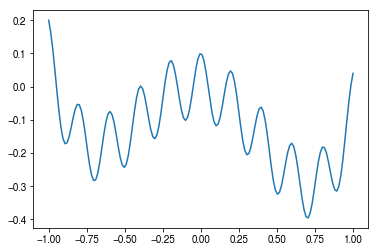

In [4]:
xp = np.linspace(-1.0, 1.0, num=150)
yp = [f(x) for x in xp]
plt.plot(xp, yp);

Generate data

In [5]:
beta0 = 0.02
r_beta = 1.02
sweep = 500
N_iter =400
skip = 2000
x0 = 0.0

data_dir = '../data/function1'
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    
fname = os.path.join(data_dir, 'SA_b0{0:.4f}_br{1:.4f}_sweep{2:d}_iter{3:d}.dat'.format(beta0, r_beta, sweep, N_iter))
fmt = ['%.4f', '%.4f']

counter = 0
beta = beta0
x = x0
with open(fname, 'bw') as fout:
    np.savetxt(fout, [[beta, x]], fmt=fmt)
    for i in range(N_iter):
        for j in range(sweep):
            counter += 1
            x = updater(f, x, beta)
            if counter%skip == 0:
                np.savetxt(fout, [[beta, x]], fmt=fmt)
                counter = 0
                print('beta: {0:.4f} x: {1: .4f}'.format(beta, x), flush=True)
        beta *= r_beta
        # Save the last state
        if i == N_iter-1 and counter != 0:
            np.savetxt(fout, [[beta, x]], fmt=fmt)
            print('beta: {0:.4f} x: {1: .4f}'.format(beta, x), flush=True)

beta: 0.0212 x:  0.2200
beta: 0.0230 x: -0.1900
beta: 0.0249 x:  0.0700
beta: 0.0269 x:  0.2100
beta: 0.0291 x: -0.0100
beta: 0.0315 x:  0.4200
beta: 0.0341 x:  0.4200
beta: 0.0370 x:  0.7000
beta: 0.0400 x:  0.4900
beta: 0.0433 x:  0.5800
beta: 0.0469 x: -0.1500
beta: 0.0507 x:  0.1200
beta: 0.0549 x: -0.1500
beta: 0.0594 x: -0.6100
beta: 0.0643 x: -0.7500
beta: 0.0696 x: -0.8400
beta: 0.0754 x: -0.4200
beta: 0.0816 x:  0.3600
beta: 0.0883 x:  0.7400
beta: 0.0956 x:  0.8800
beta: 0.1035 x:  0.0300
beta: 0.1120 x: -0.2200
beta: 0.1212 x: -0.6300
beta: 0.1312 x: -0.9500
beta: 0.1421 x: -0.8300
beta: 0.1538 x: -0.4000
beta: 0.1664 x: -0.5200
beta: 0.1802 x: -0.0900
beta: 0.1950 x:  0.3000
beta: 0.2111 x:  0.8000
beta: 0.2285 x:  0.8900
beta: 0.2473 x:  0.4900
beta: 0.2677 x:  0.2900
beta: 0.2898 x:  0.7800
beta: 0.3137 x:  0.8800
beta: 0.3395 x:  0.5200
beta: 0.3675 x:  0.1300
beta: 0.3978 x:  0.8400
beta: 0.4306 x:  0.8400
beta: 0.4661 x:  0.4700
beta: 0.5045 x:  0.2300
beta: 0.5461 x: 

Plot data

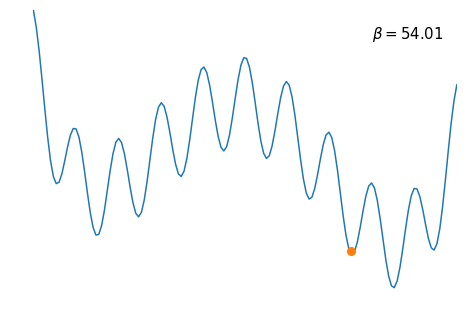

In [6]:
beta0 = 0.02
r_beta = 1.02
sweep = 500
N_iter =400

data_dir = '../data/function1' 
fname = os.path.join(data_dir, 'SA_b0{0:.4f}_br{1:.4f}_sweep{2:d}_iter{3:d}.dat'.format(beta0, r_beta, sweep, N_iter))

data = np.loadtxt(fname)
size = data.shape[0]

fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(top=0.99, left=0.01, right=0.99, bottom=0.02)
ax.set_ylim(-0.4, 0.2)
ax.set_xlim(-1, 1)
ax.axis('off')

xp = np.linspace(-1.0, 1.0, num=150)
yp = [f(x) for x in xp]
line, = ax.plot(xp, yp)
point, = ax.plot([0.0], [f(0.0)+0.005], 'o', ms=8)
beta_text = ax.text(0.8, 0.9, '', transform=ax.transAxes, fontsize=15)

def update_fig(i):
    beta = data[i,0]
    x = data[i,1]
    point.set_data(x, f(x)+0.005)
    beta_text.set_text(r'$\beta = {:.2f}$'.format(beta))
    return point,

ani = animation.FuncAnimation(fig, update_fig, size, interval=100, blit=True)
ani.save('SA.mp4', dpi=100)

## Function 2

In [ ]:
# Define another objective function
def g(x):
    square = x * x
    return 1.5 * square - 0.3 * cos(10.0 * pi * x)

In [ ]:
xp = np.linspace(-1.0, 1.0, num=150)
yp = [g(x) for x in xp]
plt.plot(xp, yp);

In [ ]:
beta0 = 0.02
r_beta = 1.02
sweep = 500
N_iter = 400
skip = 50
x0 = 0.0

beta = beta0

...